In [1]:
import meshposition as mp
import utils as utl
import numpy as np
import matplotlib.pyplot as plt
import analyse_utils as atl

In [2]:
# can optionally be called for capture, must be followed by mp.stop() to close the serial port
mp.start()

uart> device with serial 000760129940 found at COM35
uart> COM35 : is Open


mp>serial thread started


In [3]:
#needed in case nodes output traffic on the channel e.g. when switching off and on
mp.clear()

clearing 0 entries


# RF Diagnosis

In [5]:
node_ids = mp.rf_get_active_short_ids()
utl.save_json_timestamp("config_twr",node_ids)

(Test) : (1)/(90A971A3D1A1B648)
(FrontRight) : (2)/(98501ED22B42EB41)
(FrontLeft) : (3)/(E8D81FEE52C283EB)
(Simple) : (2)/(5F7D70F99F462C99)
4 entries saved in ./test_db/config_twr 2021.08.01 15-02-14.json


'./test_db/config_twr 2021.08.01 15-02-14.json'

In [81]:
mp.test_rf_ping_rssi("Wired", 3)
mp.test_rf_ping_rssi("Simple", 3)
mp.test_rf_ping_rssi("Green", 3)

test_ping(0)> rssi = 63
test_ping(1)> rssi = 63
test_ping(2)> rssi = 63
test_ping(0)> rssi = 69
test_ping(1)> rssi = 69
test_ping(2)> rssi = 69
test_ping(0)> rssi = 58
test_ping(1)> rssi = 58
test_ping(2)> rssi = 58


In [82]:
mp.rf_short_id("Green")

1

# UWB Diagnosis

In [89]:
diag_list = mp.get_list_uwb_ping_diag([("Wired","Simple"),("Wired","Green")], 50)
utl.save_json_timestamp("ping_twr_far",diag_list)

db_uwb_ping_diag> Skipping sequence 0 due to missing responses
db_uwb_ping_diag> Skipping sequence 1 due to missing responses
db_uwb_ping_diag> Skipping sequence 2 due to missing responses
db_uwb_ping_diag> Skipping sequence 6 due to missing responses
db_uwb_ping_diag> Skipping sequence 7 due to missing responses
db_uwb_ping_diag> Skipping sequence 8 due to missing responses
db_uwb_ping_diag> Skipping sequence 9 due to missing responses
db_uwb_ping_diag> Skipping sequence 12 due to missing responses
db_uwb_ping_diag> Skipping sequence 13 due to missing responses
db_uwb_ping_diag> Skipping sequence 30 due to missing responses
db_uwb_ping_diag> Skipping sequence 31 due to missing responses
db_uwb_ping_diag> Skipping sequence 34 due to missing responses
db_uwb_ping_diag> Skipping sequence 37 due to missing responses
db_uwb_ping_diag> Skipping sequence 41 due to missing responses
db_uwb_ping_diag> Skipping sequence 45 due to missing responses
db_uwb_ping_diag> Skipping sequence 46 due to m

'./test_db/ping_twr_far 2021.07.29 19-50-58.json'

In [2]:
diag_list = utl.load_json("./test_db/ping_twr 2021.07.26 19-23-57.json")

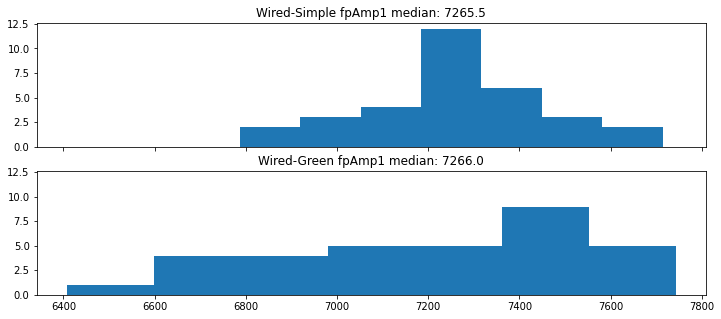

In [90]:
atl.plot_ping_list_param([("Wired","Simple"),("Wired","Green")],"fpAmp1", diag_list)

# Ranging

In [100]:
twr_list = mp.uwb_twr(initiator="Wired", responders=["Simple","Green"], step_ms=10, count=50, count_ms=30)
newFileName = utl.save_json_timestamp("res_twr_far",twr_list)

100 entries saved in ./test_db/res_twr_far 2021.07.29 19-53-50.json


In [18]:
twr_list = utl.load_json("./test_db/res_twr_cover 2021.07.29 19-51-40.json")

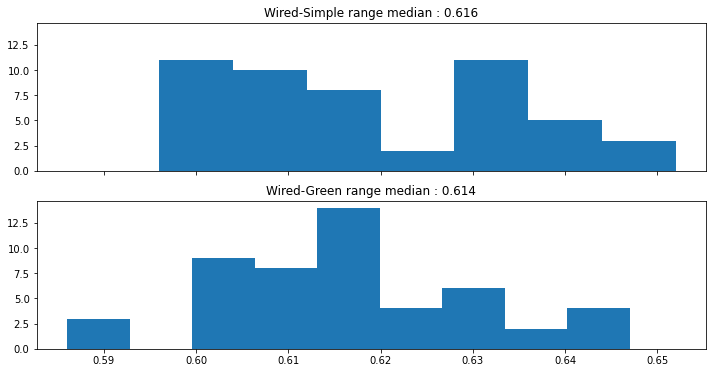

In [101]:
atl.plot_twr_list([("Wired","Simple"),("Wired","Green")], twr_list)

In [43]:
mp.stop()